*#MOVIE_LENS_RATING_PREDICTION*

Submitted By: Y.Hari Prasad

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#uploading datasets
User_Data_df=pd.read_csv('users.dat',sep='::',names=['UserID','Gender','Age','Occupation','Zip-code']) #since our dataset is in .dat format we changed the seperator to :: and we used names to add title to different columns
User_Data_df

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [3]:
Ratings_Data_df=pd.read_csv('ratings.dat',sep='::',names=['UserID','MovieID','Rating','Timestamp']) #since our dataset is in .dat format we changed the seperator to :: and we used names to add title to different columns
Ratings_Data_df

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [4]:
Movies_Data_df=pd.read_csv('movies.dat',sep='::',names=['MovieID','Title','Genres']) #since our dataset is in .dat format we changed the seperator to :: and we used names to add title to different columns
Movies_Data_df

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [5]:
#Removing Unnecessary Columns
Ratings_Data_df.drop('Timestamp',axis=1,inplace=True)
User_Data_df.drop('Zip-code',axis=1,inplace=True)

In [6]:
User_Data_df

,UserID,Gender,Age,Occupation
0,1,F,1,10
1,2,M,56,16
2,3,M,25,15
3,4,M,45,7
4,5,M,25,20
...,...,...,...,...
6035,6036,F,25,15
6036,6037,F,45,1
6037,6038,F,56,1
6038,6039,F,45,0


In [7]:
#Creating a Master DataSet
Master_df_1=pd.merge(Ratings_Data_df,User_Data_df,on='UserID') #here i used inner join because i checked both df and user id was similar in both cases and also i dont need a user data if he has not given any ratings because at the end of the day i want to predict ratings, so adding a user data of person who has not given a rating is meaningless, so i used inner join
Master_df_1.info()
print(Ratings_Data_df.shape)
print(User_Data_df.shape)
Master_df_1
print(Master_df_1[(Master_df_1['UserID']==308)&(Master_df_1['MovieID']==1)])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   MovieID     1000209 non-null  int64 
 2   Rating      1000209 non-null  int64 
 3   Gender      1000209 non-null  object
 4   Age         1000209 non-null  int64 
 5   Occupation  1000209 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 53.4+ MB
(1000209, 3)
(6040, 4)
       UserID  MovieID  Rating Gender  Age  Occupation
45680     308        1       4      M   25           2


*#Inner Join is preferred in this case because i dont require user details of a person who doesnot have a entry in ratings table. Here it has combined the ratings of users on diff movie id with their personal information*

In [8]:
Master_df=pd.merge(Master_df_1,Movies_Data_df,on='MovieID') #here i used inner join because i dont need the movie name if there is no corresponding rating available for that movie
Master_df.info() #Checking if there is any null values or not
Master_df
print(Master_df[(Master_df['UserID']==308)&(Master_df['MovieID']==1)])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   MovieID     1000209 non-null  int64 
 2   Rating      1000209 non-null  int64 
 3   Gender      1000209 non-null  object
 4   Age         1000209 non-null  int64 
 5   Occupation  1000209 non-null  int64 
 6   Title       1000209 non-null  object
 7   Genres      1000209 non-null  object
dtypes: int64(5), object(3)
memory usage: 68.7+ MB
       UserID  MovieID  Rating Gender  Age  Occupation             Title  \
41730     308        1       4      M   25           2  Toy Story (1995)   

                            Genres  
41730  Animation|Children's|Comedy  


*#Here as well i used inner join based on Movie Id because i wanted only those movie names to be added to the DF that were actually rated by a user or else there is no need of that movie name if i dont have a rating to infer*

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

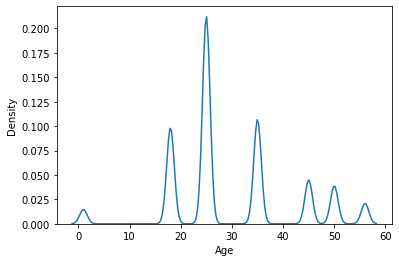

In [9]:
#User Age Distribution
sns.distplot(Master_df['Age'],hist=False) #For Plotting user age distribution

*From this curve we can infer that users within the age group in and around age of 25 have participated in rating a movie. And we also can infer that moderate number of users between age groups 15-20 and 30-40 have participated in rating. And participation slowly declines as we progress to the older ages (40-60). And we can say users between age groups 5-15 have not voted.

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

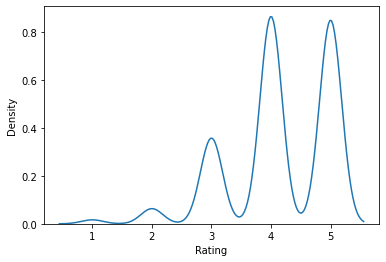

In [10]:
#User Rating of the Movie "TOY STORY"
x=Master_df[Master_df['Title']=='Toy Story (1995)']['Rating']
sns.distplot(x,hist=False)

*#From this we can infer that most of the users have rated toy story with 4 or 5, which means that this movie had a good opinion with the people and there were moderate number of people who rated 3.

In [11]:
#Top 25 movies by Viewership Ratings
Ratings_mean=Master_df.groupby('Title')['Rating'].agg(Mean_rating=('mean')) #First i grouped the movies with their rating, since there are more than one rating for different movies i calculated the mean rating of all user. Here i also named the output column because i wanted to access that column for sorting funtions
print(Ratings_mean)
Ratings_mean.sort_values(by=['Mean_rating'],ascending=False,inplace=True) #after grouping the ratings were unordered, so i arranged them in descending order using sort_values funtion
Ratings_mean.head(25)

                                            Mean_rating
Title                                                  
$1,000,000 Duck (1971)                         3.027027
'Night Mother (1986)                           3.371429
'Til There Was You (1997)                      2.692308
'burbs, The (1989)                             2.910891
...And Justice for All (1979)                  3.713568
...                                                 ...
Zed & Two Noughts, A (1985)                    3.413793
Zero Effect (1998)                             3.750831
Zero Kelvin (Kj�rlighetens kj�tere) (1995)     3.500000
Zeus and Roxanne (1997)                        2.521739
eXistenZ (1999)                                3.256098

[3706 rows x 1 columns]


,Mean_rating
Title,
Ulysses (Ulisse) (1954),5.000000
Lured (1947),5.000000
Follow the Bitch (1998),5.000000
Bittersweet Motel (2000),5.000000
Song of Freedom (1936),5.000000
One Little Indian (1973),5.000000
Smashing Time (1967),5.000000
Schlafes Bruder (Brother of Sleep) (1995),5.000000
"Gate of Heavenly Peace, The (1995)",5.000000


*#Here since i took average rating for the movies, some movies might have 5 star rating but only one user might have voted for this movie. But if i am not taking mean right i cannot group them and print top 25 movies. I also tried max funtion, that is also not suitable for this situation because almost all movies had one 5 start rating and it never gave an ideal representation. So considering these points, i decided to use mean and then sort them based on rating and print the first 25 entries

In [12]:
#Find the ratings for all the movies reviewed by for a particular user of user id=2696
User_2696_ratings=Master_df[Master_df['UserID']==2696] #seperating the data of user 2696 using filtering method to get the movie ratings that were rated by him
User_2696_ratings

,UserID,MovieID,Rating,Gender,Age,Occupation,Title,Genres
24345,2696,1270,2,M,25,7,Back to the Future (1985),Comedy|Sci-Fi
29848,2696,1097,3,M,25,7,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi
244232,2696,1617,4,M,25,7,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller
250014,2696,800,5,M,25,7,Lone Star (1996),Drama|Mystery
273633,2696,3386,1,M,25,7,JFK (1991),Drama|Mystery
277808,2696,3176,4,M,25,7,"Talented Mr. Ripley, The (1999)",Drama|Mystery|Thriller
371178,2696,1711,4,M,25,7,Midnight in the Garden of Good and Evil (1997),Comedy|Crime|Drama|Mystery
377250,2696,1589,3,M,25,7,Cop Land (1997),Crime|Drama|Mystery
598042,2696,1783,4,M,25,7,Palmetto (1998),Film-Noir|Mystery|Thriller
603189,2696,1892,4,M,25,7,"Perfect Murder, A (1998)",Mystery|Thriller


*#From the above df we can infer that user 2696 has only rated for the movies that were released before the year 2000. Based on this we can partially infer that user 2696 is an aged person

In [13]:
#Find out all the Unique Genres
Unique_Genre=Master_df.copy()
Unique_Genre['Genres']=Unique_Genre['Genres'].str.split('|')   #splits the object values of each cell based on "|" and returns a list in the cell which consists of different genres
print(Unique_Genre['Genres'])
Unique_Genre=Unique_Genre.explode('Genres')  #Explode function splits the different genres corresponding to single film and seperates the same film into multiple row entries and enters a single genre corresponding to that film  
print(Unique_Genre)
unique_Genre_list=Unique_Genre['Genres'].unique()
print(unique_Genre_list)
number_of_unique_Genre=Unique_Genre['Genres'].nunique()
print('In total there are',number_of_unique_Genre,'unique genres')

0                           [Drama]
1                           [Drama]
2                           [Drama]
3                           [Drama]
4                           [Drama]
                     ...           
1000204               [Documentary]
1000205                     [Drama]
1000206                     [Drama]
1000207    [Comedy, Drama, Western]
1000208               [Documentary]
Name: Genres, Length: 1000209, dtype: object
         UserID  MovieID  Rating Gender  Age  Occupation  \
0             1     1193       5      F    1          10   
1             2     1193       5      M   56          16   
2            12     1193       4      M   25          12   
3            15     1193       4      M   25           7   
4            17     1193       5      M   50           1   
...         ...      ...     ...    ...  ...         ...   
1000206    5780     2845       1      M   18          17   
1000207    5851     3607       5      F   18          20   
1000207    5851    

*Here first i splitted the genre column data and converted them to list of seperate elements, next i made a seperate row for each genre corresponding to that list using explode function. Then i applied the unique funtion to infer the different genres that are available in the dataset. In total there are 18 different genres of a film*

In [14]:
#Create Seperate Columns for each genre category with one hot encoding to check if the movie belongs to that genre or not
Encoding_output=Master_df['Genres'].str.get_dummies('|') #Using one hot encoding, since our column has different genres in a single cell we are splitting them into seperate categories using str package
Master_df=pd.concat([Master_df,Encoding_output],axis=1)
Master_df

,UserID,MovieID,Rating,Gender,Age,Occupation,Title,Genres,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,F,1,10,One Flew Over the Cuckoo's Nest (1975),Drama,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1193,5,M,56,16,One Flew Over the Cuckoo's Nest (1975),Drama,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,1193,4,M,25,12,One Flew Over the Cuckoo's Nest (1975),Drama,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,1193,4,M,25,7,One Flew Over the Cuckoo's Nest (1975),Drama,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,1193,5,M,50,1,One Flew Over the Cuckoo's Nest (1975),Drama,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,M,18,17,Modulations (1998),Documentary,0,0,...,0,0,0,0,0,0,0,0,0,0
1000205,5675,2703,3,M,35,14,Broken Vessels (1998),Drama,0,0,...,0,0,0,0,0,0,0,0,0,0
1000206,5780,2845,1,M,18,17,White Boys (1999),Drama,0,0,...,0,0,0,0,0,0,0,0,0,0
1000207,5851,3607,5,F,18,20,One Little Indian (1973),Comedy|Drama|Western,0,0,...,0,0,0,0,0,0,0,0,0,1


*Here one hot encoding converts the categorical genre values to numerical values and also creates seperate column for each specific genre

In [15]:
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 26 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   UserID       1000209 non-null  int64 
 1   MovieID      1000209 non-null  int64 
 2   Rating       1000209 non-null  int64 
 3   Gender       1000209 non-null  object
 4   Age          1000209 non-null  int64 
 5   Occupation   1000209 non-null  int64 
 6   Title        1000209 non-null  object
 7   Genres       1000209 non-null  object
 8   Action       1000209 non-null  int64 
 9   Adventure    1000209 non-null  int64 
 10  Animation    1000209 non-null  int64 
 11  Children's   1000209 non-null  int64 
 12  Comedy       1000209 non-null  int64 
 13  Crime        1000209 non-null  int64 
 14  Documentary  1000209 non-null  int64 
 15  Drama        1000209 non-null  int64 
 16  Fantasy      1000209 non-null  int64 
 17  Film-Noir    1000209 non-null  int64 
 18  Horror       1000209 n

In [16]:
Master_df.drop('Genres',axis=1,inplace=True) #dropping the genre column because i have added its corresponding one hot encoding values, so it is not required for modelling
Master_df

,UserID,MovieID,Rating,Gender,Age,Occupation,Title,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,F,1,10,One Flew Over the Cuckoo's Nest (1975),0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1193,5,M,56,16,One Flew Over the Cuckoo's Nest (1975),0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,1193,4,M,25,12,One Flew Over the Cuckoo's Nest (1975),0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,1193,4,M,25,7,One Flew Over the Cuckoo's Nest (1975),0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,1193,5,M,50,1,One Flew Over the Cuckoo's Nest (1975),0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,M,18,17,Modulations (1998),0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000205,5675,2703,3,M,35,14,Broken Vessels (1998),0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000206,5780,2845,1,M,18,17,White Boys (1999),0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000207,5851,3607,5,F,18,20,One Little Indian (1973),0,0,0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

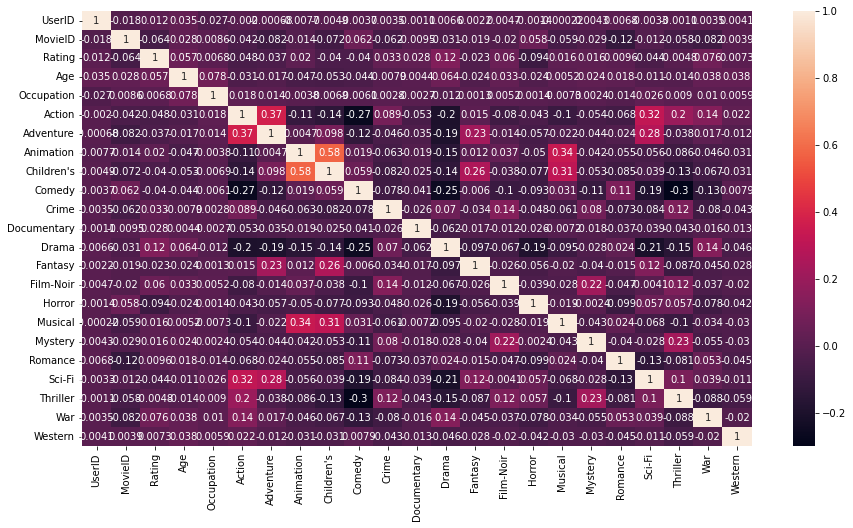

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.heatmap(Master_df.corr(),annot=True)

In [18]:
#Testing the correlation between categorical datas 
from scipy import stats
coeff_gender,p_val_gender,dof,expected=stats.chi2_contingency(Master_df['Rating'],Master_df['Gender'])
print(p_val_gender)
if p_val_gender<0.05:
    print('Accept Alternate Hypothesis----> Gender will impact Ratings')
else:
    print('Accept Null Hypothesis----> Gender has no impact on Ratings')
coeff_title,p_val_title,dof_title,expected_title=stats.chi2_contingency(Master_df['Rating'],Master_df['Title'])
print(p_val_title)
if p_val_title<0.05:
    print('Accept Alternate Hypothesis----> Title will impact Ratings')
else:
    print('Accept Null Hypothesis----> Title has no impact on Ratings')
coeff_occupation,p_val_occupation,dof_occupation,expected_occupation=stats.chi2_contingency(Master_df['Rating'],Master_df['Occupation'])
print(p_val_occupation)
if p_val_occupation<0.05:
    print('Accept Alternate Hypothesis----> Occupation will impact Ratings')
else:
    print('Accept Null Hypothesis----> Occupation has no impact on Ratings')

1.0
Accept Null Hypothesis----> Gender has no impact on Ratings
1.0
Accept Null Hypothesis----> Title has no impact on Ratings
1.0
Accept Null Hypothesis----> Occupation has no impact on Ratings


#Even though Gender has no impact on ratings, i believe that the ratings might differ based on the gender because boys mostly love action movies but whereas girls tend to like comedy genres. So, i have decided to keep this column for model building and decided to remove Occupation because it showed less correlation way in heatmap and in hypothesis testing as well it showed no relation, so i am removing this column as well. Title can anyways be removed because we already have movie_id to infer the movie.

In [19]:
Master_df.head()

,UserID,MovieID,Rating,Gender,Age,Occupation,Title,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,F,1,10,One Flew Over the Cuckoo's Nest (1975),0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1193,5,M,56,16,One Flew Over the Cuckoo's Nest (1975),0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,1193,4,M,25,12,One Flew Over the Cuckoo's Nest (1975),0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,1193,4,M,25,7,One Flew Over the Cuckoo's Nest (1975),0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,1193,5,M,50,1,One Flew Over the Cuckoo's Nest (1975),0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#Removing the features which are not affecting the Rating parameter
Master_df=Master_df.drop(['Occupation','Title'],axis=1)
Master_df

,UserID,MovieID,Rating,Gender,Age,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,F,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1193,5,M,56,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,1193,4,M,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,1193,4,M,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,1193,5,M,50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,M,18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000205,5675,2703,3,M,35,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000206,5780,2845,1,M,18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000207,5851,3607,5,F,18,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [21]:
#encoding the age column to get a numerical data for model building
Gender=pd.get_dummies(Master_df['Gender'],drop_first=True)
Master_df=pd.concat([Master_df,Gender],axis=1)
Master_df=Master_df.drop('Gender',axis=1)
Master_df.head()

,UserID,MovieID,Rating,Age,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,M
0,1,1193,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1193,5,56,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,12,1193,4,25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,15,1193,4,25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,17,1193,5,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 23 columns):
 #   Column       Non-Null Count    Dtype
---  ------       --------------    -----
 0   UserID       1000209 non-null  int64
 1   MovieID      1000209 non-null  int64
 2   Rating       1000209 non-null  int64
 3   Age          1000209 non-null  int64
 4   Action       1000209 non-null  int64
 5   Adventure    1000209 non-null  int64
 6   Animation    1000209 non-null  int64
 7   Children's   1000209 non-null  int64
 8   Comedy       1000209 non-null  int64
 9   Crime        1000209 non-null  int64
 10  Documentary  1000209 non-null  int64
 11  Drama        1000209 non-null  int64
 12  Fantasy      1000209 non-null  int64
 13  Film-Noir    1000209 non-null  int64
 14  Horror       1000209 non-null  int64
 15  Musical      1000209 non-null  int64
 16  Mystery      1000209 non-null  int64
 17  Romance      1000209 non-null  int64
 18  Sci-Fi       1000209 non-null  int64
 19  

#Now we dont have any string types in our data and we can use this data for model building

In [23]:
#Assigning data to variables to facilitate the model building
x=Master_df.drop('Rating',axis=1)
y=Master_df['Rating']
print(x.head())
print(y.head())

   UserID  MovieID  Age  Action  Adventure  Animation  Children's  Comedy  \
0       1     1193    1       0          0          0           0       0   
1       2     1193   56       0          0          0           0       0   
2      12     1193   25       0          0          0           0       0   
3      15     1193   25       0          0          0           0       0   
4      17     1193   50       0          0          0           0       0   

   Crime  Documentary  ...  Film-Noir  Horror  Musical  Mystery  Romance  \
0      0            0  ...          0       0        0        0        0   
1      0            0  ...          0       0        0        0        0   
2      0            0  ...          0       0        0        0        0   
3      0            0  ...          0       0        0        0        0   
4      0            0  ...          0       0        0        0        0   

   Sci-Fi  Thriller  War  Western  M  
0       0         0    0        0  0  
1 

In [24]:
#Splitting the dataset into training data and test data
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
print(x_train)
print(y_train)

        UserID  MovieID  Age  Action  Adventure  Animation  Children's  \
104776     652     1690   18       1          0          0           0   
244345    2978     1617   35       0          0          0           0   
927514    2850      464   18       1          1          0           0   
918300    1449     1938   35       0          0          0           0   
527518    1624     2011   25       0          0          0           0   
...        ...      ...  ...     ...        ...        ...         ...   
617841    1586     2394   45       0          0          1           0   
443712    4746     1271   50       0          0          0           0   
881167    5812      410   25       0          0          0           0   
760957    1176     1663   56       0          0          0           0   
345353    4312     2100   25       0          0          0           0   

        Comedy  Crime  Documentary  ...  Film-Noir  Horror  Musical  Mystery  \
104776       0      0          

*#Here i have splitted my dataset in 70 to 30 proportion of train to test data*

In [25]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_train=pd.DataFrame(sc.fit_transform(x_train))
#y_train=np.array(y_train)
#y_train=y_train.set_index('Ratings')
#y_train=np.array(y_train).reshape(-1,1)
#y_train=pd.DataFrame(sc.fit_transform(y_train))
x_test=pd.DataFrame(sc.fit_transform(x_test))
#y_test=np.array(y_test).reshape(-1,1)
#y_test=sc.fit_transform(y_test)

*Snice i am going to use logistic regression due to extreme values it will be difficult to fit a curve. So i have done Scaling of values to improve the model

In [26]:
#Build the model
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

#Fit the model
log_reg.fit(x_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [27]:
#Checking the training performance
#predicting the y values for x_train data
y_predicted=log_reg.predict(x_train)

In [28]:
#Checking the Training Accuracy score
from sklearn.metrics import accuracy_score
acc_score_training=accuracy_score(y_train,y_predicted)
print('Training_Accuracy_Of_Log_reg_model:')
print(acc_score_training)

Training_Accuracy_Of_Log_reg_model:
0.35183530438021066


In [29]:
#Checking the Training Accuracy score
y_testpred=log_reg.predict(x_test)
acc_score_testing=accuracy_score(y_test,y_testpred)
print('Testing_Accuracy_Of_Log_reg_model:')
print(acc_score_testing)

Testing_Accuracy_Of_Log_reg_model:
0.35056138210975696


*From here we can conclude that the model can predict the ratings of a movie, but the accuracy is very low for this model. I have correspondingly tried KNN and DT both had similar average to this. The accuracy can be further improved using proper feature engineering techniques. I tested most of the testing that i know and this is the best model i can come up with. I have tried Heatmap to check correlation and i have done hypothesis testing as well to infer if there is relationship between the dependent and independent variable.From this project i could infer how important datapreprocessing is for a project and subsequent methods to implement it. Furthermore the accuracy could be low even due to outliers in the data. Future scope of this project would be to remove the outliers to improve the accuracy.*